In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Clinical Trial Data
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")
clinical_trial.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Read the Mouse and Drug Data 

mouse_drug = pd.read_csv("data/mouse_drug_data.csv")
mouse_drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
# Combine the data into a single dataset

mouse_clinical_combine = pd.merge(clinical_trial, mouse_drug, how="left",on="Mouse ID" )


# Display the data table for preview

mouse_clinical_combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combineGroup = mouse_clinical_combine.groupby(['Drug','Timepoint'])
Avg_Tumor_Volume = (combineGroup["Tumor Volume (mm3)"]).mean().reset_index()
# Avg_Tumor_Volume

# Convert to DataFrame
df_Tumor_Response = pd.DataFrame(Avg_Tumor_Volume)

# Preview DataFrame
df_Tumor_Response.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

combineGroup = mouse_clinical_combine.groupby(['Drug','Timepoint'])
Standard_Error_of_Tumor = combineGroup["Tumor Volume (mm3)"].sem().reset_index()

# Convert to DataFrame

df_Standard_Error_of_Tumor = pd.DataFrame(Standard_Error_of_Tumor)


# Preview DataFrame

df_Standard_Error_of_Tumor.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
#Syntax: DataFrame.pivot(index=None, columns=None, values=None)[source]

Re_Format = Avg_Tumor_Volume.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
Re_Format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


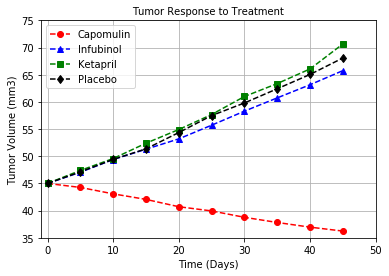

In [7]:
# Generate the Plot (with Error Bars)

#Generate the axis arange 
x_axis = np.arange(0, 50, 5)


#Generate  the Error Bars

fig, ax = plt.subplots()
tick_labels =["Capomulin","Infubinol","Ketapril","Placebo"]
Capomulin_error = ax.errorbar(x_axis, Re_Format["Capomulin"], marker="o",  ls="dashed", color ="red", label="Capomulin")
Infubinol_error =  ax.errorbar(x_axis, Re_Format["Infubinol"], marker="^", ls="dashed", color ="blue", label="Infubinol")
Ketapril_error = ax.errorbar(x_axis, Re_Format["Ketapril"], marker="s", ls="dashed", color ="green", label="Ketapril")
placebo_error = ax.errorbar(x_axis, Re_Format["Placebo"], marker="d", ls="dashed",color ="black", label="Placebo")

ax.set_ylim(35,75)
ax.set_xlim(-1,50)
ax.set_title("Tumor Response to Treatment", color="Black", fontsize=10)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=10)
ax.set_xlabel("Time (Days)", fontsize=10)
ax.legend(loc="top left")


ax.grid(True)





# Save the Figure
fig.savefig("Tumor_Response_to_Treatment.png")


In [8]:
# Show the Figure
fig.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combineGroup = mouse_clinical_combine.groupby(['Drug','Timepoint'])
Mean_Met_site_group = (combineGroup["Metastatic Sites"]).mean().reset_index()

# Convert to DataFrame
df_MeanMetastatic_Response = pd.DataFrame(Mean_Met_site_group)

# Preview DataFrame
df_MeanMetastatic_Response.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
combineGroup = mouse_clinical_combine.groupby(['Drug','Timepoint'])

Error_Met_site_group = combineGroup["Metastatic Sites"].sem()

# Convert to DataFrame
df_ErrorMetastatic_Response = pd.DataFrame(Error_Met_site_group)

# Preview DataFrame
df_ErrorMetastatic_Response.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames

Re_format = Mean_Met_site_group.pivot_table(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
Re_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


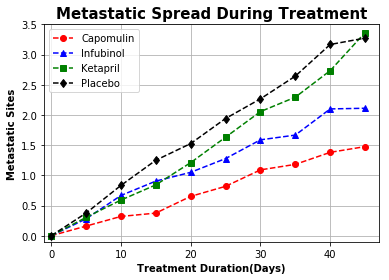

In [12]:
# Generate the Plot (with Error Bars)

x_axis2 = np.arange(0,50,5)

fig, ax = plt.subplots()

Capomulin_error = ax.errorbar(x_axis2, Re_format["Capomulin"], marker="o",  ls="dashed", color ="red", label="Capomulin")
Infubinol_error =  ax.errorbar(x_axis2, Re_format["Infubinol"], marker="^", ls="dashed", color ="blue", label="Infubinol")
Ketapril_error = ax.errorbar(x_axis2, Re_format["Ketapril"], marker="s", ls="dashed", color ="green", label="Ketapril")
placebo_error = ax.errorbar(x_axis2, Re_format["Placebo"], marker="d", ls="dashed",color ="black", label="Placebo")

ax.set_ylim(-0.1, 3.5)
ax.set_xlim(-1, 47)
ax.set_title("Metastatic Spread During Treatment", weight='bold', fontsize=15)
ax.set_xlabel("Treatment Duration(Days)", weight='bold', fontsize=10)
ax.set_ylabel("Metastatic Sites", weight='bold', fontsize=10)
ax.legend(loc="top left")

ax.grid(True)



# Save the Figure
fig.savefig("Metastatic_Spread_During_Treatment.png")

# Show the Figure
fig.show()

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

combineGroup = mouse_clinical_combine.groupby(['Drug','Timepoint'])
Count_of_Mice = (combineGroup["Mouse ID"]).count().reset_index()

# Convert to DataFrame

df_of_Count_of_Mice = pd.DataFrame(Count_of_Mice)

# Preview DataFrame

df_of_Count_of_Mice.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames

Re_Format2 = df_of_Count_of_Mice.pivot_table(values="Mouse ID", index = "Timepoint", columns="Drug")

# Preview the Data Frame
Re_Format2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


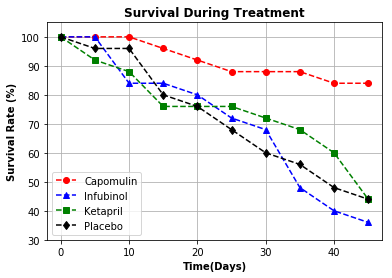

In [15]:
# Generate the Plot (Accounting for percentages)

x_axis_3 = np.arange(0,50,5)
fig, ax = plt.subplots()

Camulin_err_3=ax.errorbar(x_axis_3,Re_Format2["Capomulin"]/25*100, marker="o",color="red",ls="dashed",label="Capomulin" )
Infubinol_err_3 =  ax.errorbar(x_axis_3,Re_Format2["Infubinol"]/25*100, marker="^", ls="dashed", color ="blue", label="Infubinol" )
Ketapril_err_3 = ax.errorbar(x_axis_3, Re_Format2["Ketapril"]/25*100, marker="s", ls="dashed", color ="green", label="Ketapril")
placebo_err_3 = ax.errorbar(x_axis_3, Re_Format2["Placebo"]/25*100, marker="d", ls="dashed",color ="black", label="Placebo")

ax.set_ylim(30, 105)
ax.set_xlim(-2, 47)

ax.set_title("Survival During Treatment",weight='bold', fontsize=12)
ax.set_xlabel("Time(Days)", weight='bold', fontsize=10)
ax.set_ylabel("Survival Rate (%)", weight='bold', fontsize=10)
ax.legend(loc="bottom left")
ax.grid(True)


# Save the Figure
fig.savefig("Survival_During_Treatment.png")

# Show the Figure
fig.show()

## Summary Bar Graph

In [24]:
Capomulin = ((Re_Format["Capomulin"][45] - Re_Format["Capomulin"][0])/45)*100
Ceftamin = ((Re_Format["Ceftamin"][45] - Re_Format["Infubinol"][0])/45)*100
infuchange = ((Re_Format["Infubinol"][45] - Re_Format["Infubinol"][0])/45)*100
ketachange = ((Re_Format["Ketapril"][45] - Re_Format["Ketapril"][0])/45)*100
naftchange = ((Re_Format["Naftisol"][45] - Re_Format["Naftisol"][0])/45)*100
placchange = ((Re_Format["Propriva"][45] - Re_Format["Propriva"][0])/45)*100
ramichange = ((Re_Format["Ramicane"][45] - Re_Format["Ramicane"][0])/45)*100
stelchange = ((Re_Format["Stelasyn"][45] - Re_Format["Stelasyn"][0])/45)*100
zonichange = ((Re_Format["Zoniferol"][45] - Re_Format["Zoniferol"][0])/45)*100

drug_change_df = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"],
                               "Percent Change": [Capomulin, infuchange, ketachange, placchange]
                              })
drug_change_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,47.241175


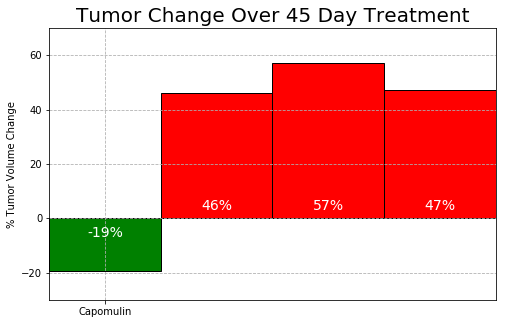

In [26]:
# Store all Relevant Percent Changes into a Tuple
percentage_change = 100 * (Re_Format.iloc[-1] - Re_Format.iloc[0]) / Re_Format.iloc[0] 
Tuple_of_Drug_PercentChanges = [percentage_change["Capomulin"],percentage_change["Infubinol"],percentage_change["Ketapril"],percentage_change["Placebo"]]

# Display the data to confirm
percentage_change 
# Splice the data between passing and failing drugs


plt.figure(figsize=(8,5))

rects1 = plt.bar(0, drug_change_df["Percent Change"][0], color='g', alpha=1, align="edge", ec="black", width=1)
rects2 = plt.bar(1, drug_change_df["Percent Change"][1], color='r', alpha=1, align="edge", ec="black", width=1)
rects3 = plt.bar(2, drug_change_df["Percent Change"][2], color='r', alpha=1, align="edge", ec="black", width=1)
rects4 = plt.bar(3, drug_change_df["Percent Change"][3], color='r', alpha=1, align="edge", ec="black", width=1)

tick_locations = [value+0.5 for value in x_axis]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, drug_change_df["Drug"])

plt.xlim(0, 4)
plt.ylim(-30, 70)

plt.title("Tumor Change Over 45 Day Treatment", fontsize=20)
plt.ylabel("% Tumor Volume Change")




def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()




